In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import keras 
import tensorflow as tf

%matplotlib inline

# Utility

for cnn

1. png_construct
2. png_to_matrix
3. shuffling_data

for All

4. train_valid_divide
5. csv_to_dataset

In [33]:
def csv_to_dataset(is_cnn = True, csvpath = "./bitcoin_ticker.csv", fromidx = 39000) : 
    
    def df_norm(df) : 
        newdf = (df - df.mean()) /(df.max() - df.min()) 
        return newdf - newdf.min()
    
    data = pd.read_csv('./bitcoin_ticker.csv')
    data = data[data['market'] == 'korbit']
    data = data[data['rpt_key'] == 'btc_krw']
    data = data[['last', 'volume']]
    
    data_norm = df_norm(data)
    data_pretty = data_norm[fromidx:] # 2017년 6월 28일 데이터부터 사용 
    
    plt.plot(data_pretty)
    plt.show()
    
    x_data = []
    y_data = []
    
    data_pretty_values= data_pretty.values
    
    if is_cnn :
        for i in range(30, data_pretty.shape[0]-6) : 
            x_data.append( df_norm( data_pretty[i-30: i] ).values )  #30 min

            p1 = data_pretty_values[i,0] 
            p2 = data_pretty_values[i+5,0] 

            result = int(p2 > p1)   # y=1 => 5분뒤 오른다  / y=0 => 5분뒤 내린다 
            y_data.append(result)

        x_data = np.array(x_data, np.float32)
        y_data = np.array(y_data, np.float32)
        y_data = np.reshape(y_data, [data_pretty.shape[0]-36, 1])
        
    else : 
        for i in range(30, data_pretty.shape[0]-6) : 
            x_data.append( data_pretty[i-30: i].values )  #30 min

            p1 = data_pretty_values[i,0] 
            p2 = data_pretty_values[i+5,0] 

            result = int(p2 > p1)   # y=1 => 5분뒤 오른다  / y=0 => 5분뒤 내린다 
            y_data.append(result)

        x_data = np.array(x_data, np.float32)
        y_data = np.array(y_data, np.float32)
        y_data = np.reshape(y_data, [data_pretty.shape[0]-36, 1])   
        
    return x_data, y_data

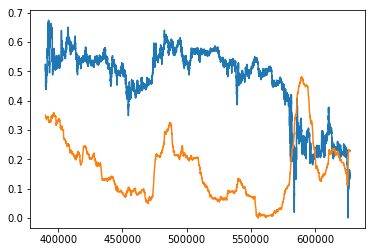

(array([[[ 0.50904703,  0.34983221],
         [ 0.52412546,  0.34950322],
         [ 0.51085645,  0.34875932],
         ..., 
         [ 0.44813028,  0.34425038],
         [ 0.44813028,  0.34379199],
         [ 0.44752714,  0.34359601]],
 
        [[ 0.52412546,  0.34950322],
         [ 0.51085645,  0.34875932],
         [ 0.50844389,  0.34855136],
         ..., 
         [ 0.44813028,  0.34379199],
         [ 0.44752714,  0.34359601],
         [ 0.44511458,  0.34325016]],
 
        [[ 0.51085645,  0.34875932],
         [ 0.50844389,  0.34855136],
         [ 0.50603133,  0.34846744],
         ..., 
         [ 0.44752714,  0.34359601],
         [ 0.44511458,  0.34325016],
         [ 0.44511458,  0.34294423]],
 
        ..., 
        [[ 0.1544029 ,  0.23090224],
         [ 0.15259349,  0.23139697],
         [ 0.15259349,  0.23118572],
         ..., 
         [ 0.15138721,  0.22824456],
         [ 0.14354645,  0.22916065],
         [ 0.15199035,  0.22916053]],
 
        [[ 0.15259349,  0.

In [70]:
csv_to_dataset(is_cnn = False, csvpath = "./bitcoin_ticker.csv", fromidx = 39000)

In [26]:
## image construction 
## input : numpy array with shape (batch, length, features) / directory / dpi = image size
## output : -- 
## doing : making png files in selected directory

def png_construct(data , directory = './x_data', dpi = 10) : 
    
    for i in range(data.shape[0])  :     
        fig = plt.figure(i , frameon=False)
        fig.set_size_inches(5,5)

        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)

        plt.plot(data[i, :, :], linewidth=5)
        plt.ylim(0.0,1.0)

        fig.savefig(directory +'/' + str(i) + '.png', transparant = True, pad_inches = 0 , dpi = dpi)

        plt.close(fig)
        if i == 0 :
            print('<Start Constructing>')
        elif i%1000 == 0 : 
            print('./x_data/' + str(i-999) + '.png to ' +'./x_data/' + str(i) + ".png have been saved")
        elif i == data.shape[0]-1 : 
            print('<Complete Image Constructing> : Total ',data.shape[0],' images into ', directory)
        #print(batches[9000].shape)

In [34]:
#image to matrix

#input : number of images, directory 
#output : numpy array of images

def png_to_matrix(num ,directory = './x_data'):  

    import matplotlib.image as mpimg

    x_data = [] 

    for i in range(num) :
        img = mpimg.imread(directory+'/'+ str(i) +'.png') # type : np.float32

        x_data.append(img)

        if i == 0 :
            print("<Start Transfer> : shape = ", img.shape)

        #elif i%1000 == 0 : 
        #    print('./x_data/' + str(i-999) + '.png to ' +'./x_data/' + str(i) + ".png have been transfered to numpy Matrix.")
       
        elif i == num-1 : 
            print('<Complete image to Matrix transfer>  : Total ',num ,' matrix into list => shape = ', img.shape)
    
    x_data = np.array(x_data, dtype=np.float32)
    return x_data

#print('x_data length: ',len(x_data)  , 'matrix shape: ' , x_data[0].shape)

In [28]:
class DiffLengthError(Exception):
    print('batch length of x_data and y_data are not same')

batch length of x_data and y_data are not same


In [29]:
# Shuffling datas
#input : x_data, y_data with same length
def shuffling_data(x_data, y_data) :
    if x_data.shape[0] != y_data.shape[0]:
        raise DiffLengthError
        return 0
    else : 
        from random import shuffle

        x_data = list(x_data)
        y_data = list(y_data)
        # Given list1 and list2
        list1_shuf = []
        list2_shuf = []
        index_shuf = list(range(len(x_data)))
        shuffle(index_shuf)
        for i in index_shuf:
            list1_shuf.append(x_data[i])
            list2_shuf.append(y_data[i])

        x_data = np.array(list1_shuf)
        y_data = np.array(list2_shuf)
        
        return x_data, y_data

In [30]:

def train_valid_divide(x_data, y_data, per = 0.8) : 
    if x_data.shape[0] != y_data.shape[0]:
        raise DiffLengthError
        return 0
    else : 
        if len(x_data.shape) ==4 : 
            l = x_data.shape[0]
            tl = int(l * per )
            train_x = x_data[:tl, :,:,:]
            train_y = y_data[:tl, :]

            valid_x = x_data[tl: ,:,:,:]
            valid_y = y_data[tl:, :]

            return train_x, train_y, valid_x, valid_y
        elif len(x_data.shape) ==3 :
            l = x_data.shape[0]
            tl = int(l * per )
            train_x = x_data[:tl, :,:]
            train_y = y_data[:tl, :]

            valid_x = x_data[tl: ,:,:]
            valid_y = y_data[tl:, :]

            return train_x, train_y, valid_x, valid_y


# CNN  data

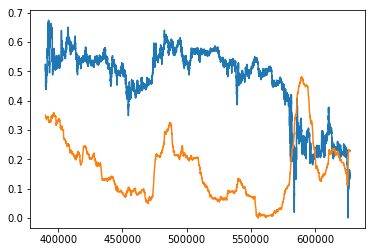

<Start Transfer> : shape =  (50, 50, 4)
<Complete image to Matrix transfer>  : Total  23683  matrix into list => shape =  (50, 50, 4)
cnn_x.shape: (23683, 50, 50, 4) cnn_y.shape (23683, 1)
ctrain_x, ctrain_y :  (18946, 50, 50, 4) (18946, 1) cvalid_x, cvalid_y :  (4737, 50, 50, 4) (4737, 1)


In [35]:
x_data , y_data = csv_to_dataset(is_cnn = True, csvpath = "./bitcoin_ticker.csv", fromidx = 39000)
#png_constuct(x_data)

cnn_x = png_to_matrix(x_data.shape[0])
cnn_y = y_data

print('cnn_x.shape:',cnn_x.shape, 'cnn_y.shape',cnn_y.shape)

cnn_x , cnn_y = shuffling_data(cnn_x, cnn_y)

ctrain_x ,ctrain_y, cvalid_x, cvalid_y = train_valid_divide(cnn_x, cnn_y)

print('ctrain_x, ctrain_y : ',ctrain_x.shape, ctrain_y.shape, 'cvalid_x, cvalid_y : ', cvalid_x.shape, cvalid_y.shape )

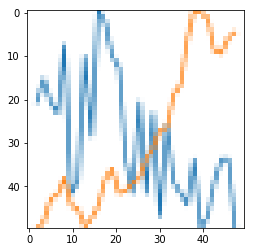

In [16]:
plt.imshow(cvalid_x[3])

# Making CNN Graph

In [21]:
## Graph 
def cnn_graph(learning_rate = 0.001):
    cnn = tf.Graph()
    with cnn.as_default() : 

        #feed 
        X = tf.placeholder(name = "X", shape = [None, 50, 50 , 4], dtype = np.float32)
        Y = tf.placeholder(name = "Y", shape = [None, 1], dtype = np.float32)

        #TRAINABLE variables
        w1 = tf.get_variable(shape = [3,3,4,32], initializer = tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w1")
        #w2 = tf.get_variable(shape = [3,3,32,64], initializer= tf.random_normal_initializer(stddev = 0.01, mean= 0.0), name = 'w2')

        #w3 = tf.get_variable(shape = [13*13*64 , 256], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w3")
        w3 = tf.get_variable(shape = [25*25*32 , 256], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w3")
        w4 = tf.get_variable(shape = [256 , 1], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w4")

        b3 = tf.get_variable(shape = [256], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "b3")
        b4 = tf.get_variable(shape = [1], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "b4") 

        #Operations

        #<conv1>
        conv1_c = tf.nn.conv2d(X, w1 , strides = [1,1,1,1] , padding = 'SAME') 
        #conv1_c shape : [None, 50,50,32]
        conv1_r = tf.nn.relu(conv1_c)
        conv1_p = tf.nn.max_pool(conv1_r, ksize = [1,2,2,1] , strides = [1,2,2,1], padding = 'SAME')
        #conv1_p shape : [None, 25,25, 32]

        ##<conv2>
        #conv2_c = tf.nn.conv2d(conv1_p , w2, strides = [1,1,1,1], padding = 'SAME')
        ##conv2_c shape : [None, 25, 25, 64]
        #conv2_r = tf.nn.relu(conv2_c)
        #conv2_p = tf.nn.max_pool(conv2_r, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
        ##conv2_p shape : [None, 13, 13 ,64]

        #<flattening>
        #flattened = tf.reshape(conv2_p , [-1, 13*13*64])
        flattened = tf.reshape(conv1_p , [-1, 25*25*32])

        #<2 layer fully connected NN>
        fc_1 = tf.nn.relu(tf.matmul(flattened , w3) + b3)
        fc_2 = tf.nn.sigmoid(tf.matmul(fc_1, w4) + b4)


        #Loss function : square mean 
        loss = tf.reduce_mean(tf.square(fc_2 - Y ))

        #Optimizer : Adam Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)
        train = optimizer.minimize(loss)

        #Accuracy
        fc_2 = fc_2 > 0.5
        fc_2 = tf.to_float(fc_2)

        accuracy = tf.reduce_mean(tf.to_float(tf.equal(fc_2, Y)))
    tf.reset_default_graph()
    op_list = [X, Y, loss, train, accuracy]
    return cnn, op_list


    
    

# RNN data

In [34]:
rnn_x = x_data 
rnn_y = y_data

print(rnn_x.shape, rnn_y.shape)

rtrain_x , rtrain_y, rvalid_x, rvalid_y = train_valid_divide(rnn_x, rnn_y)

(23683, 30, 2) (23683, 1)


# Making RNN Graph

In [57]:
def rnn_graph(learning_rate = 0.001, n_hidden = 128) :
    rnn = tf.Graph()
    with rnn.as_default() : 
        #feed
        X = tf.placeholder(tf.float32, [None, 30, 2], name = 'X')
        Y = tf.placeholder(tf.float32, [None, 1], name = 'Y')
        
        #TRAINABLE variables
        cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
        w = tf.get_variable(name = 'w', shape = [n_hidden, 1] ,initializer = tf.random_normal_initializer(stddev=0.01, mean=0.0))
        b = tf.get_variable(name = 'b', shape = [1] ,initializer = tf.random_normal_initializer(stddev=0.01, mean=0.0))
        
        #Operations
        
        ##<RNN>
        outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32) 
        # outputs shape : (None, n_step, n_hidden)
        
        outputs = tf.transpose(outputs, [1, 0, 2])
        # outputs shape : (n_step, None, n_hidden)  
        outputs = outputs[-1]  # 마지막 셀에서 나온 결과값만 사용합니다. 
        #shape : (None, n_hidden)  
        
        ##<basic NN>
        fc = tf.nn.sigmoid(tf.matmul(outputs, w) + b)
        
        #Loss function
        loss = tf.reduce_sum(tf.square(fc - Y))
        
        #Optimizer : Adam Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
        #Accuracy
        fc = fc > 0.5
        fc = tf.to_float(fc)
        accuracy = tf.reduce_mean(tf.to_float(tf.equal(fc, Y)), name= 'accuracy')
        
    tf.reset_default_graph()
    op_list = [X, Y, loss, train, accuracy]
    
    return rnn , op_list

# Runtime 

In [46]:

def runtime(name , g , op_list , datalist , ckptfile = None, total_epoches = 2, batch_size = 100) : 
    ## Runtime 
    import time 
    X, Y, loss, train, accuracy  = op_list[0], op_list[1], op_list[2], op_list[3], op_list[4]
    train_x, train_y, valid_x, valid_y = datalist[0] ,datalist[1], datalist[2], datalist[3]
    
    with tf.Session(graph=g) as sess : 
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        if ckptfile == None  : 

            ## <training> 
            total_batches = int(train_x.shape[0]/batch_size)

            print("Training Start : epoch = ", total_epoches, ", each epoch has ", total_batches," batch."  )

            for epoch in range(total_epoches) :
                print("<epoch ", epoch," >")
                total_loss = 0
                epoch_start = time.time()
                for i in range(total_batches) : 
                    if len(train_x.shape) == 4:
                        batch_x  = train_x[ i*batch_size : (i+1)*batch_size ,:,:,: ]
                        batch_y  = train_y[ i*batch_size : (i+1)*batch_size ,: ]
                    elif len(train_x.shape) == 3:
                        batch_x  = train_x[ i*batch_size : (i+1)*batch_size ,:,:]
                        batch_y  = train_y[ i*batch_size : (i+1)*batch_size ,: ]

                    sess.run(train, feed_dict = {X : batch_x, Y : batch_y} )
                    l = sess.run(loss, feed_dict = {X : batch_x, Y : batch_y})
                    acc = sess.run(accuracy, feed_dict = {X : batch_x, Y : batch_y} )

                    total_loss += l

                    if i%20 == 0 or i== total_batches-1  : 
                        print("batch ", i , "/",total_batches , ": loss=", l, ", accuracy=", acc)

                epoch_time = time.time() - epoch_start
                m = int(epoch_time / 60) 
                s = epoch_time - m*60 

                print("=>epoch ", epoch, " result: time=",m,"m ", int(s),"s , ", "total loss=", total_loss )

            print("Training Complete!")

            save_path = saver.save(sess, "./ckpt/"+name+".ckpt")
            print("Model`s Variables are saved at : ", save_path)
        else :
            saver.restore(sess, ckptfile)

        ##<validation> 
        val_acc = sess.run(accuracy, feed_dict = {X : valid_x , Y : valid_y})
        print("=> Validation Set Accuracy is ", val_acc * 100 , "%.")


In [49]:
def cnn_graph(learning_rate = 0.001):
    cnn = tf.Graph()
    with cnn.as_default() :

        #feed
        X = tf.placeholder(name = "X", shape = [None, 50, 50 , 4], dtype = np.float32)
        Y = tf.placeholder(name = "Y", shape = [None, 1], dtype = np.float32)

        #TRAINABLE variables
        w1 = tf.get_variable(shape = [5,5,4,64], initializer = tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w1")
        w1_2 = tf.get_variable(shape = [7,7,64,32], initializer = tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w1_2")
        #w2 = tf.get_variable(shape = [3,3,32,64], initializer= tf.random_normal_initializer(stddev = 0.01, mean= 0.0), name = 'w2')

        #w3 = tf.get_variable(shape = [13*13*64 , 256], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w3")
        w3 = tf.get_variable(shape = [25*25*32 , 256], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w3")
        w4 = tf.get_variable(shape = [256 , 1], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "w4")

        b3 = tf.get_variable(shape = [256], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "b3")
        b4 = tf.get_variable(shape = [1], initializer= tf.random_normal_initializer(stddev = 0.01, mean = 0.0), name = "b4")

        #Operations

        #<conv1>
        conv1_c = tf.nn.conv2d(X, w1 , strides = [1,1,1,1] , padding = 'SAME')
        #conv1_c shape : [None, 50,50,32]
        conv1_r = tf.nn.relu(conv1_c)

        conv1_2_c = tf.nn.conv2d(conv1_r, w1_2 , strides = [1,1,1,1] , padding = 'SAME')
        conv1_2_r = tf.nn.relu(conv1_2_c)

        conv1_p = tf.nn.max_pool(conv1_2_r, ksize = [1,2,2,1] , strides = [1,2,2,1], padding = 'SAME')
        #conv1_p shape : [None, 25,25, 32]

        ##<conv2>
        #conv2_c = tf.nn.conv2d(conv1_p , w2, strides = [1,1,1,1], padding = 'SAME')
        ##conv2_c shape : [None, 25, 25, 64]
        #conv2_r = tf.nn.relu(conv2_c)
        #conv2_p = tf.nn.max_pool(conv2_r, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
        ##conv2_p shape : [None, 13, 13 ,64]

        #<flattening>
        #flattened = tf.reshape(conv2_p , [-1, 13*13*64])
        flattened = tf.reshape(conv1_p , [-1, 25*25*32])

        #<2 layer fully connected NN>
        fc_1 = tf.nn.relu(tf.matmul(flattened , w3) + b3)
        fc_2 = tf.nn.sigmoid(tf.matmul(fc_1, w4) + b4)


        #Loss function : square mean
        loss = tf.reduce_mean(tf.square(fc_2 - Y ))

        #Optimizer : Adam Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)
        train = optimizer.minimize(loss)

        #Accuracy
        fc_2 = fc_2 > 0.5
        fc_2 = tf.to_float(fc_2)

        accuracy = tf.reduce_mean(tf.to_float(tf.equal(fc_2, Y)))
    tf.reset_default_graph()
    op_list = [X, Y, loss, train, accuracy]
    return cnn, op_list

# Run CNN for  binary classification

In [ ]:
#Draw graph
cnn_g , cnn_op= cnn_graph()
#Run graph
runtime(name = "2", op_list = cnn_op, datalist = [ctrain_x ,ctrain_y, cvalid_x, cvalid_y], g = cnn_g  )


cnn_g.get_operations()

Training Start : epoch =  2 , each epoch has  189  batch.
<epoch  0  >
batch  0 / 189 : loss= 0.245712 , accuracy= 0.58
batch  20 / 189 : loss= 0.250153 , accuracy= 0.53
batch  40 / 189 : loss= 0.249448 , accuracy= 0.53
batch  60 / 189 : loss= 0.245339 , accuracy= 0.57
batch  80 / 189 : loss= 0.257968 , accuracy= 0.47
batch  100 / 189 : loss= 0.238255 , accuracy= 0.61
batch  120 / 189 : loss= 0.242896 , accuracy= 0.61
batch  140 / 189 : loss= 0.246703 , accuracy= 0.56
batch  160 / 189 : loss= 0.246689 , accuracy= 0.59
batch  180 / 189 : loss= 0.256054 , accuracy= 0.55
batch  188 / 189 : loss= 0.242667 , accuracy= 0.64
=>epoch  0  result: time= 37 m  28 s ,  total loss= 46.4948637336
<epoch  1  >
batch  0 / 189 : loss= 0.245959 , accuracy= 0.58
batch  20 / 189 : loss= 0.254014 , accuracy= 0.53
batch  40 / 189 : loss= 0.24925 , accuracy= 0.53
batch  60 / 189 : loss= 0.245153 , accuracy= 0.57
batch  80 / 189 : loss= 0.257446 , accuracy= 0.47
batch  100 / 189 : loss= 0.237948 , accuracy= 0

In [38]:
cnn_g.get_collection('variables')

[<tf.Variable 'w1:0' shape=(3, 3, 4, 32) dtype=float32_ref>,
 <tf.Variable 'w3:0' shape=(20000, 256) dtype=float32_ref>,
 <tf.Variable 'w4:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'b3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'b4:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'w1/Adam:0' shape=(3, 3, 4, 32) dtype=float32_ref>,
 <tf.Variable 'w1/Adam_1:0' shape=(3, 3, 4, 32) dtype=float32_ref>,
 <tf.Variable 'w3/Adam:0' shape=(20000, 256) dtype=float32_ref>,
 <tf.Variable 'w3/Adam_1:0' shape=(20000, 256) dtype=float32_ref>,
 <tf.Variable 'w4/Adam:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'w4/Adam_1:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'b3/Adam:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'b3/Adam_1:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'b4/Adam:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'b4/Adam_1:0' shap

# Run RNN  for  binary classification

In [58]:
#Draw graph
rnn_g , rnn_op = rnn_graph()
#Run graph
runtime(name = "rnn1" ,datalist =[rtrain_x  ,rtrain_y, rvalid_x, rvalid_y], op_list = rnn_op, g = rnn_g)

Training Start : epoch =  2 , each epoch has  189  batch.
<epoch  0  >
batch  0 / 189 : loss= 24.7271 , accuracy= 0.59
batch  20 / 189 : loss= nan , accuracy= 0.49
batch  40 / 189 : loss= nan , accuracy= 0.63
batch  60 / 189 : loss= nan , accuracy= 0.58
batch  80 / 189 : loss= nan , accuracy= 0.59
batch  100 / 189 : loss= nan , accuracy= 0.56


KeyboardInterrupt: 

In [3]:
data = pd.read_csv('./bitcoin_ticker.csv')

In [5]:
data = data[data['market'] == 'korbit']
data = data[data['rpt_key'] == 'btc_krw']

In [6]:
data

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
2,2017-05-31,2017-06-01 00:00:00,korbit,btc_krw,3003500.0,3140000.0,-4.347134,3003500.0,3004000.0,3002000.0,3209500.0,6109.752872,2017-05-31 14:59:36,2017-05-31 14:59:36
14,2017-06-01,2017-06-01 00:01:00,korbit,btc_krw,3003500.0,3140000.0,-4.347134,3003500.0,3004000.0,3002000.0,3209500.0,6116.842082,2017-05-31 15:00:36,2017-05-31 15:00:36
22,2017-06-01,2017-06-01 00:02:00,korbit,btc_krw,3017000.0,3159000.0,-4.495093,3017000.0,3004000.0,3002000.0,3209500.0,6126.342962,2017-05-31 15:01:36,2017-05-31 15:01:36
32,2017-06-01,2017-06-01 00:03:00,korbit,btc_krw,3019500.0,3155500.0,-4.309935,3005000.0,3005500.0,3002000.0,3209500.0,6128.596992,2017-05-31 15:02:36,2017-05-31 15:02:36
42,2017-06-01,2017-06-01 00:04:00,korbit,btc_krw,3006000.0,3140500.0,-4.282758,3006000.0,3006500.0,3002000.0,3209500.0,6127.511262,2017-05-31 15:03:37,2017-05-31 15:03:37
52,2017-06-01,2017-06-01 00:05:00,korbit,btc_krw,3007000.0,3157000.0,-4.751346,3007000.0,3007500.0,3002000.0,3209500.0,6128.428699,2017-05-31 15:04:37,2017-05-31 15:04:37
62,2017-06-01,2017-06-01 00:06:00,korbit,btc_krw,3018500.0,3157000.0,-4.387076,3008500.0,3009000.0,3002000.0,3209500.0,6129.428699,2017-05-31 15:05:36,2017-05-31 15:05:36
72,2017-06-01,2017-06-01 00:07:00,korbit,btc_krw,3020000.0,3157000.0,-4.339563,3010500.0,3011000.0,3002000.0,3209500.0,6136.220084,2017-05-31 15:06:36,2017-05-31 15:06:36
82,2017-06-01,2017-06-01 00:08:00,korbit,btc_krw,3011500.0,3157000.0,-4.608806,3011500.0,3012000.0,3002000.0,3209500.0,6135.928803,2017-05-31 15:07:36,2017-05-31 15:07:36
92,2017-06-01,2017-06-01 00:09:00,korbit,btc_krw,3012000.0,3159500.0,-4.668460,3012000.0,3012500.0,3002000.0,3209500.0,6139.028202,2017-05-31 15:08:36,2017-05-31 15:08:36


In [11]:
data = data[['last', 'volume']]

In [12]:
def df_norm(df) : 
        newdf = (df - df.mean()) /(df.max() - df.min()) 
        return newdf - newdf.min()

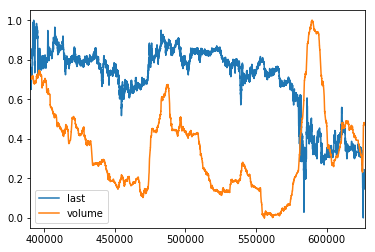

In [14]:
data = df_norm(data[39000:])

data.plot()

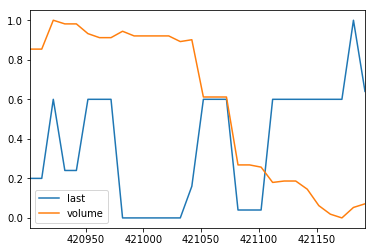

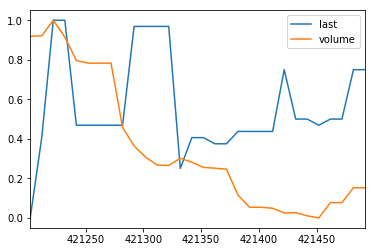

In [19]:

df_norm(data[103*30:(104)*30]).plot()
df_norm(data[104*30:(105)*30]).plot()

INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring parameters from ./ckpt/cnn4.ckpt
(3, 3, 4)
INFO:tensorflow:Restoring paramete

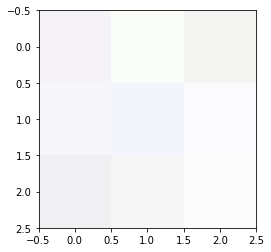

In [41]:
def visualize_weight(ckptfile, graph, index) :
    with tf.Session(graph = graph) as sess:
        saver = tf.train.Saver()
        saver.restore(sess, ckptfile)

        w1 = graph.get_tensor_by_name("w1:0")
        result = sess.run(w1)
        p1 = np.reshape(result[:,:,:,index], [3,3,4])
        print(p1.shape)
        plt.imshow(p1)

cnn_g , cnn_op = cnn_graph()

for i in range(30) :
    visualize_weight("./ckpt/cnn4.ckpt", cnn_g, i)